## DATA SCRAPING AND TEXT ANALYSIS

I use [Tweepy](http://docs.tweepy.org/en/v3.5.0/index.html) to scraping Twitter data

In [48]:
import json
import tweepy
import csv
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt


In [3]:
# load Twitter API credentials

with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

Write a helpfull function to scraping data and save to csv file

In [4]:
def get_all_tweets(screen_name):

    # Twitter allows access to only 3240 tweets via this method

    # Authorization and initialization

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    # initialization of a list to hold all Tweets

    all_the_tweets = []

    # We will get the tweets with multiple requests of 200 tweets each

    new_tweets = api.user_timeline(screen_name=screen_name, count=200)

    # saving the most recent tweets

    all_the_tweets.extend(new_tweets)

    # save id of 1 less than the oldest tweet

    oldest_tweet = all_the_tweets[-1].id - 1

    # grabbing tweets till none are left

    while len(new_tweets) > 0:
        # The max_id param will be used subsequently to prevent duplicates
        new_tweets = api.user_timeline(screen_name=screen_name,
                count=200, max_id=oldest_tweet)

        # save most recent tweets

        all_the_tweets.extend(new_tweets)

        # id is updated to oldest tweet - 1 to keep track

        oldest_tweet = all_the_tweets[-1].id - 1
        print ('...%s tweets have been downloaded so far' % len(all_the_tweets))

    # transforming the tweets into a 2D array that will be used to populate the csv

    outtweets = [[tweet.id_str, tweet.created_at,
                 tweet.text.encode('utf-8')] for tweet in all_the_tweets]

    # writing to the csv file

    with open(screen_name + '_tweets.csv', 'w', encoding='utf8') as f:
        writer = csv.writer(f)
        writer.writerow(['id', 'created_at', 'text'])
        writer.writerows(outtweets)

In [5]:
print("Scraping Indian Airline")
get_all_tweets('airindiain')
print("Scraping Singapore Airline")
get_all_tweets('SingaporeAir')

Scraping Indian Airline
...400 tweets have been downloaded so far
...600 tweets have been downloaded so far
...799 tweets have been downloaded so far
...999 tweets have been downloaded so far
...1199 tweets have been downloaded so far
...1399 tweets have been downloaded so far
...1599 tweets have been downloaded so far
...1799 tweets have been downloaded so far
...1999 tweets have been downloaded so far
...2197 tweets have been downloaded so far
...2395 tweets have been downloaded so far
...2595 tweets have been downloaded so far
...2794 tweets have been downloaded so far
...2994 tweets have been downloaded so far
...3194 tweets have been downloaded so far
...3211 tweets have been downloaded so far
...3211 tweets have been downloaded so far
Scraping Singapore Airline
...400 tweets have been downloaded so far
...600 tweets have been downloaded so far
...800 tweets have been downloaded so far
...1000 tweets have been downloaded so far
...1200 tweets have been downloaded so far
...1400 tw

## Tweets Preprocessing and Cleaning

Let's convert csv file to dataframe

In [34]:
idian_airline_file = 'airindiain_tweets.csv'
singapore_airline_file = 'SingaporeAir_tweets.csv'
df_indian = pd.read_csv(idian_airline_file,low_memory=False)
df_singapore = pd.read_csv(singapore_airline_file, low_memory=False)


Let's check

In [35]:
df_indian.head()

,id,created_at,text
0,1060811642781491201,2018-11-09 08:29:39,b'@freddiesgranny Please DM us the details.'
1,1060811302313037824,2018-11-09 08:28:18,b'@ThapliyalUtsav Dear Utsav kindly DM is the ...
2,1060811021571579904,2018-11-09 08:27:11,b'RT @rajivmishra: \xe2\x81\xa6@airindiain\xe2...
3,1060810947378495488,2018-11-09 08:26:53,b'@gadget_mnky Dear Mr. Mehrotra kindly DM the...
4,1060437356103286785,2018-11-08 07:42:22,"b'@_zaid982 Hi Zaid, we are forwarding your pr..."


In [36]:
df_singapore.head()

,id,created_at,text
0,1060793620813545472,2018-11-09 07:18:02,"b'@tkwhawaii Hi there, a laptop is considered ..."
1,1060749587772772352,2018-11-09 04:23:04,b'@tkwhawaii A laptop bag is allowed as an add...
2,1060749541991964672,2018-11-09 04:22:53,"b'@tkwhawaii Hi there, in First Class you are ..."
3,1060743328826867712,2018-11-09 03:58:11,"b'@grayscale_vc Sorry to hear this, Nikhil. Ma..."
4,1060726310102818817,2018-11-09 02:50:34,b'@lenibellini Thank you for sharing this with...


In [37]:
df_indian['clean_text'] =df_indian['text'].str[2:-1]
df_singapore['clean_text'] =df_singapore['text'].str[2:-1]
df_indian.head()

,id,created_at,text,clean_text
0,1060811642781491201,2018-11-09 08:29:39,b'@freddiesgranny Please DM us the details.',@freddiesgranny Please DM us the details.
1,1060811302313037824,2018-11-09 08:28:18,b'@ThapliyalUtsav Dear Utsav kindly DM is the ...,@ThapliyalUtsav Dear Utsav kindly DM is the da...
2,1060811021571579904,2018-11-09 08:27:11,b'RT @rajivmishra: \xe2\x81\xa6@airindiain\xe2...,RT @rajivmishra: \xe2\x81\xa6@airindiain\xe2\x...
3,1060810947378495488,2018-11-09 08:26:53,b'@gadget_mnky Dear Mr. Mehrotra kindly DM the...,@gadget_mnky Dear Mr. Mehrotra kindly DM the d...
4,1060437356103286785,2018-11-08 07:42:22,"b'@_zaid982 Hi Zaid, we are forwarding your pr...","@_zaid982 Hi Zaid, we are forwarding your prov..."


I gonna to remove some useless words in text. So let write a function to do it

In [38]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt 

Let's check the function works

In [39]:
s = "b'@_zaid982 Hi Zaid, we are forwarding your provided details to our concerned baggage team for follow up.'"
print(s)
print(remove_pattern(s,"@[\w]*")) #remove the @user

b'@_zaid982 Hi Zaid, we are forwarding your provided details to our concerned baggage team for follow up.'
b' Hi Zaid, we are forwarding your provided details to our concerned baggage team for follow up.'


Look good. Let remove the @user

In [40]:
df_indian['clean_text'] = np.vectorize(remove_pattern)(df_indian['clean_text'],"@[\w]*")
df_singapore['clean_text'] = np.vectorize(remove_pattern)(df_singapore['clean_text'],"@[\w]*")
df_indian.head()

,id,created_at,text,clean_text
0,1060811642781491201,2018-11-09 08:29:39,b'@freddiesgranny Please DM us the details.',Please DM us the details.
1,1060811302313037824,2018-11-09 08:28:18,b'@ThapliyalUtsav Dear Utsav kindly DM is the ...,Dear Utsav kindly DM is the date of your visi...
2,1060811021571579904,2018-11-09 08:27:11,b'RT @rajivmishra: \xe2\x81\xa6@airindiain\xe2...,RT : \xe2\x81\xa6\xe2\x81\xa9 hats off to thes...
3,1060810947378495488,2018-11-09 08:26:53,b'@gadget_mnky Dear Mr. Mehrotra kindly DM the...,Dear Mr. Mehrotra kindly DM the details
4,1060437356103286785,2018-11-08 07:42:22,"b'@_zaid982 Hi Zaid, we are forwarding your pr...","Hi Zaid, we are forwarding your provided deta..."


Removing Punctuations, Numbers, and Special Characters with space

In [41]:
df_indian['clean_text'] = df_indian['clean_text'].str.replace("[^a-zA-Z#]", " ")
df_singapore['clean_text'] = df_singapore['clean_text'].str.replace("[^a-zA-Z#]", " ")
df_singapore.head()

,id,created_at,text,clean_text
0,1060793620813545472,2018-11-09 07:18:02,"b'@tkwhawaii Hi there, a laptop is considered ...",Hi there a laptop is considered one piece y...
1,1060749587772772352,2018-11-09 04:23:04,b'@tkwhawaii A laptop bag is allowed as an add...,A laptop bag is allowed as an additional item...
2,1060749541991964672,2018-11-09 04:22:53,"b'@tkwhawaii Hi there, in First Class you are ...",Hi there in First Class you are allowed pi...
3,1060743328826867712,2018-11-09 03:58:11,"b'@grayscale_vc Sorry to hear this, Nikhil. Ma...",Sorry to hear this Nikhil May we know if th...
4,1060726310102818817,2018-11-09 02:50:34,b'@lenibellini Thank you for sharing this with...,Thank you for sharing this with us May we se...


Removing Short Words: remove any word that has length 3 or less, for example: "oh", "hmm", "to"

In [42]:
df_indian['clean_text'] = df_indian['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_singapore['clean_text'] = df_singapore['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_indian.head()

,id,created_at,text,clean_text
0,1060811642781491201,2018-11-09 08:29:39,b'@freddiesgranny Please DM us the details.',Please details
1,1060811302313037824,2018-11-09 08:28:18,b'@ThapliyalUtsav Dear Utsav kindly DM is the ...,Dear Utsav kindly date your visit booking deta...
2,1060811021571579904,2018-11-09 08:27:11,b'RT @rajivmishra: \xe2\x81\xa6@airindiain\xe2...,hats these airindian gentleman understanding m...
3,1060810947378495488,2018-11-09 08:26:53,b'@gadget_mnky Dear Mr. Mehrotra kindly DM the...,Dear Mehrotra kindly details
4,1060437356103286785,2018-11-08 07:42:22,"b'@_zaid982 Hi Zaid, we are forwarding your pr...",Zaid forwarding your provided details concerne...


Tokenization: let split sentence from all tweets data to single word 

In [43]:
tokenized_indian = df_indian['clean_text'].apply(lambda x:x.split())
tokenized_singapore = df_singapore['clean_text'].apply(lambda x:x.split())
tokenized_indian.head()

0                                    [Please, details]
1    [Dear, Utsav, kindly, date, your, visit, booki...
2    [hats, these, airindian, gentleman, understand...
3                    [Dear, Mehrotra, kindly, details]
4    [Zaid, forwarding, your, provided, details, co...
Name: clean_text, dtype: object

Stemming:
    Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. I use [nltk](https://www.nltk.org/) for processing stemming

In [44]:
from nltk.stem.porter import * 
stemmer = PorterStemmer()
tokenized_indian = tokenized_indian.apply(lambda x:[stemmer.stem(i) for i in x])
tokenized_singapore = tokenized_singapore.apply(lambda x:[stemmer.stem(i) for i in x])
tokenized_indian.head()

0                                      [pleas, detail]
1    [dear, utsav, kindli, date, your, visit, book,...
2    [hat, these, airindian, gentleman, understand,...
3                     [dear, mehrotra, kindli, detail]
4    [zaid, forward, your, provid, detail, concern,...
Name: clean_text, dtype: object

Let's stitch these tokens back together

In [45]:
for i in range(len(tokenized_indian)):
    tokenized_indian[i] = ' '.join(tokenized_indian[i])
df_indian['clean_text'] = tokenized_indian 
for i in range(len(tokenized_singapore)):
    tokenized_singapore[i] = ' '.join(tokenized_singapore[i])
df_singapore['clean_text'] = tokenized_singapore 
df_indian.head()

,id,created_at,text,clean_text
0,1060811642781491201,2018-11-09 08:29:39,b'@freddiesgranny Please DM us the details.',pleas detail
1,1060811302313037824,2018-11-09 08:28:18,b'@ThapliyalUtsav Dear Utsav kindly DM is the ...,dear utsav kindli date your visit book detail ...
2,1060811021571579904,2018-11-09 08:27:11,b'RT @rajivmishra: \xe2\x81\xa6@airindiain\xe2...,hat these airindian gentleman understand make ...
3,1060810947378495488,2018-11-09 08:26:53,b'@gadget_mnky Dear Mr. Mehrotra kindly DM the...,dear mehrotra kindli detail
4,1060437356103286785,2018-11-08 07:42:22,"b'@_zaid982 Hi Zaid, we are forwarding your pr...",zaid forward your provid detail concern baggag...


Let's check the common words in tweeter indian airline to see whether we could guess it positve or negative

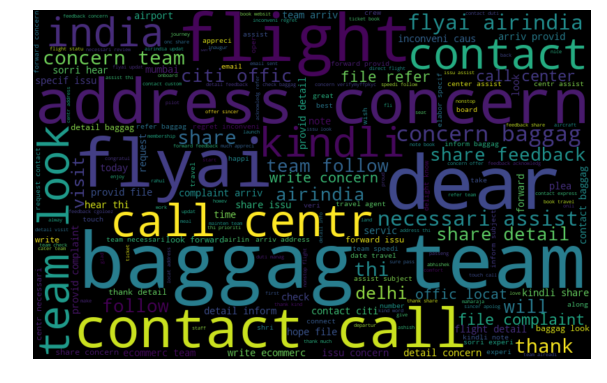

In [51]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df_indian['clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

It seems that we cannot retrieve the conclusion from here

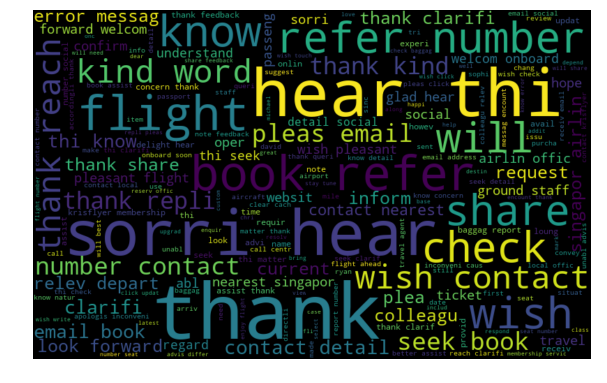

In [50]:
all_words = ' '.join([text for text in df_singapore['clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

And also, there is no clue from singapore airline

Before to do sentiment analysis, we need to estimate the term frequency of two tweets: the number occurrences of a word in all the dataset

In [63]:
from collections import Counter
term_frequency_indian = Counter()
for text in tokenized_indian:
    term_all = [term for term in text.split(" ")]
    term_frequency_indian.update(term_all)
term_frequency_singapore = Counter()
for text in tokenized_singapore:
    term_all =[term for term in text.split(" ")]
    term_frequency_singapore.update(term_all)
#Print 5 most common words in indian tweets
print(term_frequency_indian.most_common(5))
#print 5 most common words in singapore tweets occurrences
print(term_frequency_singapore.most_common(5))

[('your', 1559), ('http', 1437), ('with', 699), ('team', 651), ('contact', 557)]
[('http', 2110), ('your', 1728), ('thank', 1394), ('thi', 730), ('hear', 573)]


We want also to know the term co-occurrences: that is the number of tearms that occur together

In [65]:
from collections import defaultdict
com_indian  = defaultdict(lambda:defaultdict(int))
com_singapore = defaultdict(lambda:defaultdict(int))
for text in tokenized_indian:
    term_all = [term for term in text.split(" ")]
    for i in range(len(term_all)-1):
        for j in range(i+1,len(term_all)):
            w1, w2 = sorted([term_all[i],term_all[j]])
            if w1 != w2:
                com_indian[w1][w2] +=1
                
                
for text in tokenized_singapore:
    term_all = [term for term in text.split(" ")]
    for i in range(len(term_all)-1):
        for j in range(i+1,len(term_all)):
            w1, w2 = sorted([term_all[i],term_all[j]])
            if w1 != w2:
                com_singapore[w1][w2] +=1
                            

### Sentiment analysis basic

The idea is that if customers are satisfied with the services of the airline, they will say many positive words such as: good, excellent, satisfy, etc. And in the opposite, many negative words might be occurred in the tweets such as:poor, sad, disappointed, etc if customers are not satisfied with the services.

I use [opinion lexicon](http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon) provided by Bing Liu which contains the list of positive words and negative words. Let find how many possitive words and negative words occurr in two dataset

In [83]:
positive_word_file = 'opinion-lexicon-English/positive-words.txt'
negative_word_file = 'opinion-lexicon-English/negative-words.txt'
with open(positive_word_file,'r') as f:
    lines = f.readlines()[35:]
    lines = [line.rstrip() for line in lines]
    positive_words = lines 
with open(negative_word_file,'r') as f:
    lines = f.readlines()[35:]
    lines = [line.rstrip() for line in lines]
    negative_words = lines

In [93]:
import seaborn as sns

In [105]:
def sentiment_analysis(term_frequency):
    term_pos = dict()
    term_neg = dict()
    sum_pos = 0
    sum_neg = 0
    for pos in positive_words:
        if pos in term_frequency:
            term_pos[pos] = term_frequency[pos]
            sum_pos +=term_frequency[pos]
    for neg in negative_words:
        if neg in term_frequency:
            term_neg[neg] = term_frequency[neg]
            sum_neg +=term_frequency[neg]
            
    labels = ["positive words", "negative words"]
    counts = [sum_pos,sum_neg]
    plt.pie(counts,labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title("Number of positive words and negative words in tweets")
    plt.axis('equal')
    plt.show()

    pos_pd = pd.DataFrame({'Word':list(term_pos.keys()),
                           'Count':list(term_pos.values())})
    # selecting top 10 most frequent word    
    d = pos_pd.nlargest(columns="Count", n = 10) 
    plt.figure(figsize=(16,5))
    ax = sns.barplot(data=d, x= "Word", y = "Count")
    ax.set(ylabel = 'Count')
    plt.title("Positive word count")
    plt.show()

    neg_pd = pd.DataFrame({'Word':list(term_neg.keys()),
                           'Count':list(term_neg.values())})
    # selecting top 10 most frequent word    
    d = neg_pd.nlargest(columns="Count", n = 10) 
    plt.figure(figsize=(16,5))
    ax = sns.barplot(data=d, x= "Word", y = "Count")
    ax.set(ylabel = 'Count')
    plt.title("Negative word count")
    plt.show()

    


Let's see positive words and negative words in Singapore Airline

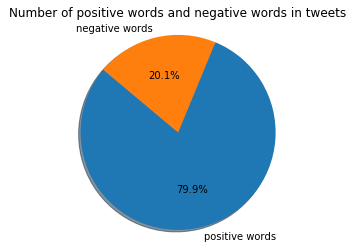

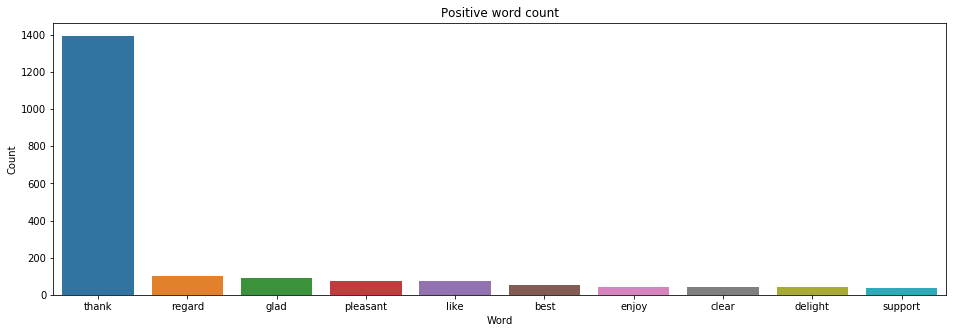

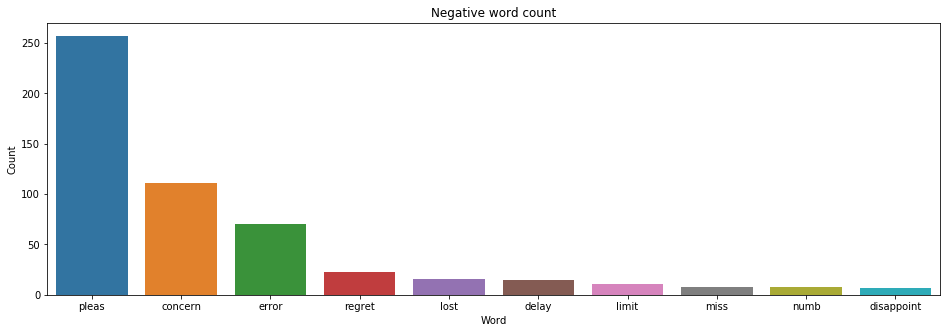

In [106]:
sentiment_analysis(term_frequency_singapore)

We see that with Singpaore Airline, people often say positive words with 79.9% and negative words is 20.1%. The most positive word is "thank" and the most negative word is "pleas". We have some evidences to say that the customers are satisfied with Singapore Airline in Tweeter

Let's see positive words and negative words in Indian Airline

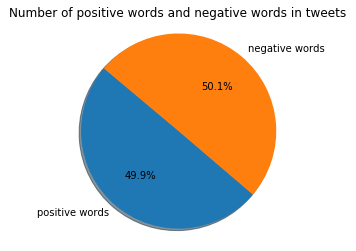

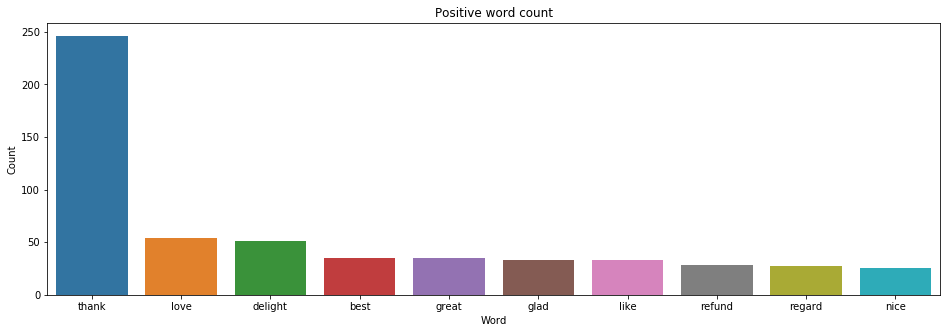

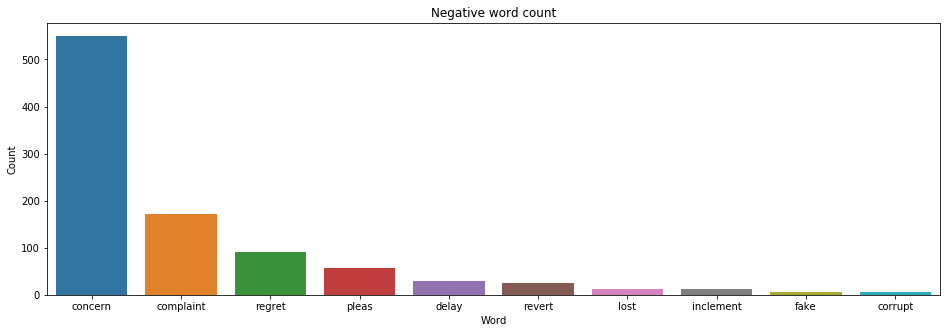

In [107]:
sentiment_analysis(term_frequency_indian)

With Indian Airline, there are the balance in the negative words and positive words with nearly 50% for both of these. The most common positive word is "thank" and the most common negative word is "concern"

There are many ways to analysize the sentiment of the dataset. One of these is building a classifier model to train and predict. However in this problem, I do not have the label of satistied and not satisfied for this dataset. In addition, I do not want to use some other trained model outsite built on other dataset (Movie Review dataset) so that I choose this naive approach. 